In [1]:
import time
import os
cwd = os.getcwd()
print(cwd)

# A bunch of libraries that are good to have but not necessary
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
# matplotlib inline

from numpy import mean
from numpy import median


C:\Users\Mak Hozo\Documents\Data Science\ParkingTickets


In [2]:
# Data available at http://bit.ly/ticket-data

print("Begin data import")
start = time.time()
tickets = pd.read_csv('data\processed\parking_tickets.csv', nrows=1000000 , dtype={'zipcode': object, 'unit': object, 'ticket_number':object, 'notice_number':object})
tickets.head()
end = time.time()
print(end - start, "seconds")
print("(",(end - start)/60,"minutes)")
print("Done")


Begin data import
11.029626846313477 seconds
( 0.18382711410522462 minutes)
Done


In [3]:
print(len(tickets.index), "records read in this dataset\n") 
print("First five records:\n")
print(tickets.head())
print("Data types:\n")
print(tickets.dtypes)
print("Summary of numeric variables:\n")
print(tickets.describe())
print("Summary of numeric variables:\n")
print(tickets.info())

1000000 records read in this dataset

First five records:

  ticket_number           issue_date violation_location  \
0      51551278  2007-01-01 00:00:00     6014 W 64TH ST   
1      51491256  2007-01-01 00:00:00     530 N MICHIGAN   
2      50433524  2007-01-01 00:01:00        4001 N LONG   
3      51430906  2007-01-01 00:01:00       303 E WACKER   
4      51507779  2007-01-01 00:01:00        7 E 41ST ST   

                                license_plate_number license_plate_state  \
0  90ad622c3274c9bdc9d8c812b79a01d0aaf7479f2bd743...                  IL   
1  bce4dc26b2c96965380cb2b838cdbb95632b7b57160612...                  IL   
2  44641e828f4d894c883c07c566063c2d99d08f2c03b3d4...                  IL   
3  eee50ca0d9be2debd0e7d45bad05b8674a6cf5b892230f...                  IL   
4  244116ca3eed4235b1f61f6d753d8c688be2a48c9fdd97...                  IL   

  license_plate_type    zipcode violation_code  \
0                PAS      60638       0976160F   
1                PAS  6063438

In [4]:
# Find all unique values of this variable with unique()
# dataframe.variable.unique() 
tickets.license_plate_state.unique()



array(['IL', 'NJ', 'NV', 'TN', 'MN', 'TX', 'MI', 'OH', 'OR', 'CA', 'IA',
       'MO', 'WI', 'IN', 'SD', 'KY', 'MA', 'AL', 'LA', 'MS', 'AZ', 'GA',
       'NC', 'UT', 'WA', 'AK', 'ND', 'OK', 'NY', 'FL', 'PA', 'AR', 'VA',
       'NE', 'DC', 'MD', 'KS', 'NM', 'CO', 'ON', 'MB', nan, 'WV', 'SC',
       'NS', 'NH', 'NB', 'MT', 'ID', 'CT', 'RI', 'DE', 'ME', 'VT', 'VI',
       'HI', 'WY', 'PE', 'AB', 'MX', 'QU', 'BC', 'NF'], dtype=object)

In [4]:
# Examples of queries for variable license_plate_state


# tickets.query('license_plate_state != "IL"')
# tickets.query('license_plate_state != "IL"')
tickets[tickets.license_plate_state.isin(('RI', 'QU'))]
# tickets.groupby('license_plate_state').count()


,ticket_number,issue_date,violation_location,license_plate_number,license_plate_state,license_plate_type,zipcode,violation_code,violation_description,unit,...,fine_level2_amount,current_amount_due,total_payments,ticket_queue,ticket_queue_date,notice_level,hearing_disposition,notice_number,officer,address
18671,9055908858,2007-01-03 11:48:00,345 W HUBBARD,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,498,...,100,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,608,"300 w hubbard, chicago, il"
65555,9065596362,2007-01-09 00:24:00,938 W GEORGE ST,47cad625cbbb6503f4f65110568e81c35efafeca6dcb4c...,RI,PAS,02893,0964090E,RESIDENTIAL PERMIT PARKING,502,...,100,0.0,50.0,Paid,2007-06-25 00:00:00,DETR,NaN,5084100630,826,"900 w george st, chicago, il"
90775,51403232,2007-01-11 11:25:00,70 W HUBBARD,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,252,...,100,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,T163,"1 w hubbard, chicago, il"
90817,51403233,2007-01-11 11:26:00,70 W HUBBARD,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0964200B,OUTSIDE METERED SPACE,252,...,50,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,T163,"1 w hubbard, chicago, il"
92679,51203430,2007-01-11 14:25:00,4851 N BROADWAY,35d7fb899a7485231a686d61a736fc03ee0e55a439d5c0...,RI,PAS,02809,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,20,...,60,73.2,0.0,Notice,2007-09-23 00:00:00,SEIZ,NaN,5092816710,8117,"4800 n broadway, chicago, il"
105962,9065633577,2007-01-13 02:01:00,3606 N WILTON,ce5ec3c064da0e0649dd2e5b6c7978ed087abfad565670...,RI,PAS,NaN,0964090E,RESIDENTIAL PERMIT PARKING,502,...,100,0.0,50.0,Paid,2007-09-11 00:00:00,NaN,NaN,0,879,"3600 n wilton, chicago, il"
108848,50694644,2007-01-13 15:15:00,1945 W TAYLOR,b80edf37d98e3fa0bebf8f5fc6b3746ed23bec9b11d541...,RI,PAS,NaN,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,496,...,60,0.0,30.0,Paid,2007-02-09 00:00:00,NaN,NaN,0,00706,"1900 w taylor, chicago, il"
110182,50999169,2007-01-13 19:00:00,451 N KINGSBURY,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0964190A,EXP. METER NON-CENTRAL BUSINESS DISTRICT,18,...,60,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,18914,"400 n kingsbury, chicago, il"
119653,51401824,2007-01-15 14:20:00,162 HUBBARD,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,252,...,100,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,T158,"100 hubbard, chicago, il"
133264,9055911483,2007-01-17 11:47:00,431 N KINGSBURY,f5f92b9c98b955a39892b0b19b1882bae4d93a933dc290...,RI,PAS,02888,0964190B,EXPIRED METER CENTRAL BUSINESS DISTRICT,498,...,100,0.0,0.0,Dismissed,2009-02-18 00:00:00,SEIZ,NaN,5087178650,610,"400 n kingsbury, chicago, il"


In [5]:
# List of counts of each value of license_plate_state

tickets['license_plate_state'].value_counts()

# tickets.query('fine_level1_amount > 0') #format for numeric variable

IL    919112
IN     16051
MI     11154
WI     10432
OH      4798
IA      4075
TX      3082
CA      3029
MO      2909
FL      2673
MN      2392
PA      1255
TN      1255
AZ      1061
GA      1047
NY      1014
KY       954
CO       918
MA       887
KS       829
NC       798
MD       726
VA       718
NJ       665
OK       647
WA       558
MS       498
NE       494
LA       468
AL       406
       ...  
AR       343
OR       307
NM       293
ON       287
NV       274
SD       172
NH       162
RI       109
MT       102
WV       101
UT        98
ME        91
ND        83
AK        75
VT        68
DE        60
DC        58
NB        44
ID        43
MB        41
VI        41
WY        39
NS        36
HI        29
QU        25
AB        22
MX        14
BC         6
PE         5
NF         1
Name: license_plate_state, Length: 62, dtype: int64

Note the unusual values at the bottom e.g. NF, PE, BC, MX QU
They're worth investigating?

In [7]:

tickets.vehicle_make.unique()

array(['CHEV', 'CHRY', 'BUIC', 'NISS', 'INFI', 'DODG', 'LEXU', 'PONT',
       'SATR', 'VOLK', 'MAZD', 'CADI', 'OLDS', 'TOYT', 'FORD', 'MERC',
       'LNDR', 'MITS', 'KIA', 'PLYM', 'GMC', 'LINC', 'HOND', 'BMW',
       'ACUR', 'JEEP', 'SUBA', 'VOLV', 'HYUN', 'HUMM', 'MERZ', 'ISU',
       'AUDI', 'ALFA', 'JAGU', 'GEO', 'SCIO', 'MINI', 'SAAB', 'TRIU',
       'PORS', 'DAEW', 'FLNR', 'MERK', 'SUZI', 'ROV', 'DATS', 'INTL',
       'EGIL', 'SPEC', 'KENW', 'FIAT', 'OTHR', 'STRG', 'YAMA', 'KAWA',
       'HARL', 'MACK', 'RROV', 'CAP', 'LAMO', 'UNKN', 'ROL', 'POLS',
       'KYMC', 'GENU', 'BENT', 'LOTU', 'CHEC', 'AMER', 'MASE', 'PTRB',
       'FERR', 'VESP', 'MG', 'HINO', 'SCHW', 'WHIT', 'HUDS', 'CITR',
       'AUST', 'RAMB', 'RENU', 'DUCA', 'DAIH', 'LNCI', 'STU', 'DIAR',
       'WORH', 'AVTI', 'VIKI', 'PEUG', 'TRAL', 'GELY', 'STOU', 'DESO',
       'PACK', 'WSTR', 'MILA', 'BRDL', 'APRL', 'JENS', 'DERB', 'MCIN',
       'YUGO', 'JMST', 'PENS', 'PETR', 'WILS', 'OPEL'], dtype=object)

In [6]:
vehicle_make_counts = tickets['vehicle_make'].value_counts()
vehicle_make_counts

FORD    146921
CHEV    144625
TOYT     72506
HOND     62103
DODG     60891
PONT     49261
NISS     48847
JEEP     33158
BUIC     30124
OLDS     27621
CHRY     26782
VOLK     23027
MERC     22140
GMC      18918
BMW      18798
CADI     18780
SATR     15192
LEXU     14887
MITS     14546
MERZ     14459
MAZD     14009
HYUN     12935
LINC     11974
ACUR     11442
PLYM     10049
VOLV      9921
INFI      8828
AUDI      8023
KIA       6829
SUBA      6096
         ...  
CAP          9
AUST         8
STU          8
RENU         8
LNCI         7
PACK         6
WORH         6
RAMB         5
MCIN         4
GELY         4
WSTR         3
SCHW         3
DERB         3
HUDS         3
DAIH         2
YUGO         2
DIAR         2
MILA         1
VIKI         1
WILS         1
BRDL         1
AVTI         1
PETR         1
CITR         1
JMST         1
DESO         1
JENS         1
PENS         1
STOU         1
OPEL         1
Name: vehicle_make, Length: 110, dtype: int64

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


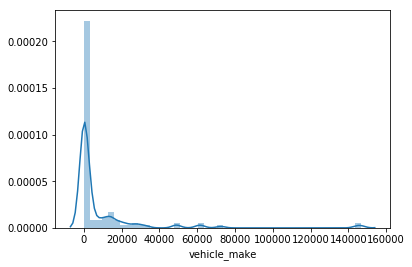

In [7]:
#histogram of vehicle_make_counts
sns.distplot( vehicle_make_counts )
#sns.plt.show()




C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


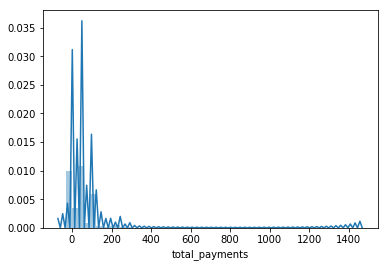

In [21]:
# Examples of  sns.barplot (Titanic Dataset):
# sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);
# sns.set_style("whitegrid")
# sns.barplot(x="Pclass", y = "Survived", data=data_train);
# sns.barplot(x="Survived", y = "Sex", data=data_train, order=["female", "male"]);
# sns.barplot(x="Pclass", y="Survived", data=data_train, estimator=mean, ci=68, capsize=0.2, palette = "Blues_d");
# sns.barplot(x="Survived", y = "Pclass", orient="h", data=data_train);

# Import library and dataset
import seaborn as sns
# df = sns.load_dataset('tickets')
 
# Make default histogram of sepal length
sns.distplot( tickets["total_payments"] )
#sns.plt.show()
 
# Control the number of bins
# sns.distplot( df["sepal_length"], bins=20 )
#sns.plt.show()


In [8]:
#
#
#
#
#
# Everything below this line is untested
###################################################
#
#
#
#

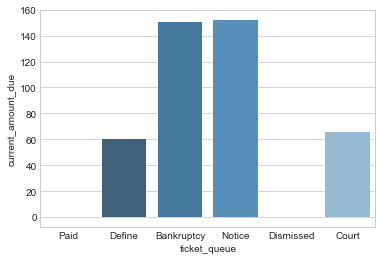

In [5]:

sns.set_style("whitegrid");
# sns.barplot(x="ticket_queue", y="current_amount_due", palette = "Blues_d", ci=None, data=tickets);
sns.barplot(x="ticket_queue", y="current_amount_due", palette = "Blues_d", ci=None, data=tickets);
# fig, ax =plt.subplots(1,2)

# sns.barplot(x="total_payments", y="current_amount_due", palette = "Blues_d", ci=None, data=tickets, ax=ax[1]);
# fig.show()
# fig.tight_layout() 
# fig, ax =plt.subplots(1,2)
# # sns.barplot(x="Parch", y="Survived", palette = "Blues_d", ci=None, data=data_train);
# sns.barplot(x="license_plate_type",  hue = "current_amount_due", y="current_amount_due", palette = "Blues_d", ci=None, data=tickets, ax=ax[0]);
# sns.barplot(x="total_payments", y="current_amount_due", palette = "Blues_d", orient="v", data=tickets, ci= None, ax=ax[1]);

# fig.tight_layout() 
# fig, ax =plt.subplots(1,2)
# sns.barplot(x="total_payments",  y = "current_amount_due", palette = "Blues_d", data=tickets, ax=ax[0]);
# sns.distplot(data_train['total_payments'].dropna(how='any'),ax=ax[1]);
# fig.tight_layout() 

# fig, ax = plt.subplots()
# for a in [data_train[data_train["Survived"]==1]["Age"].dropna(how='any'),             #yellow
#           data_train[data_train["Survived"]==0]["Age"].sample(342).dropna(how='any')]: #blue
#     sns.distplot(a, bins=range(1, 81, 10), ax=ax, kde=False)
    
# fig.tight_layout() 


# ax.set_xlim([0, 100])
# 342+549 #549 did not survive

In [6]:
print("Begin data import")
start = time.time()
census = pd.read_csv('..\ZipCode-Census\ACS_16_5YR_B02001_with_ann.csv', nrows=999 , skiprows=1)
end = time.time()
print(end - start, "seconds")
print("(",(end - start)/60,"minutes)")
print("Done")


Begin data import
0.009895801544189453 seconds
( 0.00016493002573649088 minutes)
Done


In [7]:
census.head()
# Note that in many cases the margin of error is high and the data should not be used.
# Look up the statistics of this in Google.

,Id,Id2,Geography,Estimate; Total:,Margin of Error; Total:,Estimate; Total: - White alone,Margin of Error; Total: - White alone,Estimate; Total: - Black or African American alone,Margin of Error; Total: - Black or African American alone,Estimate; Total: - American Indian and Alaska Native alone,...,Estimate; Total: - Native Hawaiian and Other Pacific Islander alone,Margin of Error; Total: - Native Hawaiian and Other Pacific Islander alone,Estimate; Total: - Some other race alone,Margin of Error; Total: - Some other race alone,Estimate; Total: - Two or more races:,Margin of Error; Total: - Two or more races:,Estimate; Total: - Two or more races: - Two races including Some other race,Margin of Error; Total: - Two or more races: - Two races including Some other race,"Estimate; Total: - Two or more races: - Two races excluding Some other race, and three or more races","Margin of Error; Total: - Two or more races: - Two races excluding Some other race, and three or more races"
0,8600000US60002,60002,ZCTA5 60002,24368,496,22554,656,501,246,5,...,0,20,402,179,611,243,0,20,611,243
1,8600000US60004,60004,ZCTA5 60004,50974,682,43525,927,640,194,38,...,25,27,1316,510,728,216,80,106,648,191
2,8600000US60005,60005,ZCTA5 60005,29936,736,25626,884,577,204,60,...,0,20,564,370,694,256,171,167,523,199
3,8600000US60007,60007,ZCTA5 60007,33733,161,27578,947,318,150,16,...,13,21,1549,683,706,262,207,186,499,185
4,8600000US60008,60008,ZCTA5 60008,22023,572,15290,837,1209,471,74,...,180,189,3191,848,269,177,14,18,255,175


In [8]:
import geopandas

path = geopandas.datasets.get_path('naturalearth_lowres')
df = geopandas.read_file(path)
# Add a column we'll use later
df['gdp_pp'] = df['gdp_md_est'] / df['pop_est']

boroughs = geopandas.read_file(geopandas.datasets.get_path('nybb')).to_crs(epsg='4326')
injurious_collisions = geopandas.read_file(
    "https://github.com/ResidentMario/geoplot-data/raw/master/nyc-injurious-collisions.geojson")

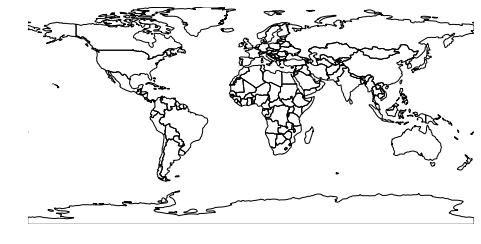

In [9]:
import geoplot

geoplot.polyplot(df, figsize=(8, 4))

C:\Anaconda\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://pysal.org/about
  ), VisibleDeprecationWarning)


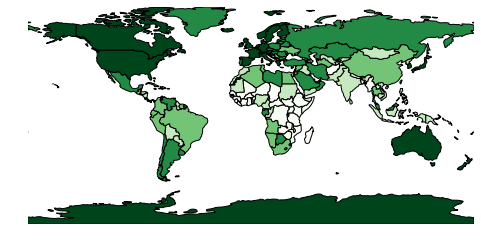

In [10]:
geoplot.choropleth(df, hue='gdp_pp', cmap='Greens', figsize=(8, 4))


In [196]:
testaddress = tickets["address"][0]
tickets["address"][0:3]

0    6000 w 64th st, chicago, il
1    500 n michigan, chicago, il
2       4000 n long, chicago, il
Name: address, dtype: object

In [215]:
print(tickets["address"][136:143])
# print(df.loc[df['A'] == 'foo'])

tickets = tickets.loc[tickets["address"] != "10200 s avenue, chicago, il"]
tickets = tickets.loc[tickets["address"] != "800 w union, chicago, il"]

# df = df[df.line_race != 0]
tickets=tickets.reset_index(drop=True)
# print(tickets.loc[tickets["address"] == "10200 s avenue, chicago, il"])



136          2500 s troy, chicago, il
137       5100 s indiana, chicago, il
138        1000 w wilson, chicago, il
139        2500 s albany, chicago, il
140       1500 w 19th st, chicago, il
141    4800 w winchester, chicago, il
142       4800 n wolcott, chicago, il
Name: address, dtype: object


In [26]:
import usaddress
# addr='123 Main St. Suite 100 Chicago, IL'

# The parse method will split your address string into components, and label each component.
# expected output: [(u'123', 'AddressNumber'), (u'Main', 'StreetName'), (u'St.', 'StreetNamePostType'), (u'Suite', 'OccupancyType'), (u'100', 'OccupancyIdentifier'), (u'Chicago,', 'PlaceName'), (u'IL', 'StateName')]
usaddress.parse(testaddress)


[('6000', 'AddressNumber'),
 ('w', 'StreetNamePreDirectional'),
 ('64th', 'StreetName'),
 ('st,', 'StreetNamePostType'),
 ('chicago,', 'PlaceName'),
 ('il', 'StateName')]

In [188]:

# The tag method will try to be a little smarter
# it will merge consecutive components, strip commas, & return an address type
# expected output: (OrderedDict([('AddressNumber', u'123'), ('StreetName', u'Main'), ('StreetNamePostType', u'St.'), ('OccupancyType', u'Suite'), ('OccupancyIdentifier', u'100'), ('PlaceName', u'Chicago'), ('StateName', u'IL')]), 'Street Address')
# testtag = usaddress.tag(testaddress)[0]
# print(testtag)
# print(testtag['AddressNumber'])
# print(usaddress.tag(testaddress)[0]['AddressNumber'])
# print(testtag.get('key',None))
# variable = dictionary.get('key', None)
# testtag2 = testtag[0]
# print(testtag2["AddressNumber"])

In [206]:
 for x in range(0,3):
#     print(list(usaddress.tag(tickets["address"][x])[0].values()))
    print(tickets["address"][x])
    print(usaddress.tag(tickets["address"][x])[0])
    print()


6000 w 64th st, chicago, il
OrderedDict([('AddressNumber', '6000'), ('StreetNamePreDirectional', 'w'), ('StreetName', '64th'), ('StreetNamePostType', 'st'), ('PlaceName', 'chicago'), ('StateName', 'il')])

500 n michigan, chicago, il
OrderedDict([('AddressNumber', '500'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'michigan'), ('PlaceName', 'chicago'), ('StateName', 'il')])

4000 n long, chicago, il
OrderedDict([('AddressNumber', '4000'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'long'), ('PlaceName', 'chicago'), ('StateName', 'il')])



In [216]:
# df2 = pd.DataFrame(np.random.randint(low=0, high=10, size=(100,6)),
#                   columns=['AddressNumber', 'StreetNamePreDirectional', 'StreetName', 'StreetNamePostType', 'PlaceName', 'StateName'])

rowstogo = 500
df2 = pd.DataFrame([],index=range(0,rowstogo),columns=['AddressNumber', 'StreetNamePreDirectional', 'StreetName', 'StreetNamePostType', 'PlaceName', 'StateName']
                  , dtype='object')
# print(df2)
# print(df2.iloc[99])
# print(df2[100])
for x in range(rowstogo):
# for i, row in train.iterrows():
    print("x is", x)
    print("Address is", tickets["address"][x])
    print("Dict is", usaddress.tag(tickets["address"][x])[0])
#     df2.iloc[x-1] = 
    print("us address is", usaddress.tag(tickets["address"][x])[0]["AddressNumber"])
#     print(usaddress.tag(testaddress)[0]['AddressNumber'])
    df2.iloc[x]['AddressNumber'] = usaddress.tag(tickets["address"][x])[0]["AddressNumber"]
    df2.iloc[x]['StreetNamePreDirectional'] = usaddress.tag(tickets["address"][x])[0]["StreetNamePreDirectional"]
    df2.iloc[x]['StreetName'] = usaddress.tag(tickets["address"][x])[0]["StreetName"]
#     df2.iloc[x]['StreetNamePostType'] =  usaddress.tag(tickets["address"][x])[0]["StreetNamePostType"]
#     usaddress.tag(tickets["address"][x])[0]["StreetNamePostType"]
    df2.iloc[x]['PlaceName'] = usaddress.tag(tickets["address"][x])[0]["PlaceName"]
    df2.iloc[x]['StateName'] = usaddress.tag(tickets["address"][x])[0]["StateName"]
    print("df2iloc is ", df2.iloc[[x]])
#     df2.iloc[x]['AddressNumber'] = x
#     usaddress.tag(tickets["address"][x])

x is 0
Address is 6000 w 64th st, chicago, il
Dict is OrderedDict([('AddressNumber', '6000'), ('StreetNamePreDirectional', 'w'), ('StreetName', '64th'), ('StreetNamePostType', 'st'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 6000
df2iloc is    AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
0          6000                        w       64th                NaN   

  PlaceName StateName  
0   chicago        il  
x is 1
Address is 500 n michigan, chicago, il
Dict is OrderedDict([('AddressNumber', '500'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'michigan'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 500
df2iloc is    AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
1           500                        n   michigan                NaN   

  PlaceName StateName  
1   chicago        il  
x is 2
Address is 4000 n long, chicago, il
Dict is OrderedDict([('AddressNumber', '4000'), ('StreetNamePreDire

22   chicago        il  
x is 23
Address is 3400 n albany, chicago, il
Dict is OrderedDict([('AddressNumber', '3400'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'albany'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 3400
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
23          3400                        n     albany                NaN   

   PlaceName StateName  
23   chicago        il  
x is 24
Address is 4700 n sheridan, chicago, il
Dict is OrderedDict([('AddressNumber', '4700'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'sheridan'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 4700
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
24          4700                        n   sheridan                NaN   

   PlaceName StateName  
24   chicago        il  
x is 25
Address is 5900 n sacramento, chicago, il
Dict is OrderedDict([('AddressNumber', '5900'), ('S

57   chicago        il  
x is 58
Address is 1400 w edgewater, chicago, il
Dict is OrderedDict([('AddressNumber', '1400'), ('StreetNamePreDirectional', 'w'), ('StreetName', 'edgewater'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 1400
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
58          1400                        w  edgewater                NaN   

   PlaceName StateName  
58   chicago        il  
x is 59
Address is 3000 s wentworth, chicago, il
Dict is OrderedDict([('AddressNumber', '3000'), ('StreetNamePreDirectional', 's'), ('StreetName', 'wentworth'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 3000
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
59          3000                        s  wentworth                NaN   

   PlaceName StateName  
59   chicago        il  
x is 60
Address is 5400 w roosevelt, chicago, il
Dict is OrderedDict([('AddressNumber', '5400

92   chicago        il  
x is 93
Address is 2900 n elston, chicago, il
Dict is OrderedDict([('AddressNumber', '2900'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'elston'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 2900
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
93          2900                        n     elston                NaN   

   PlaceName StateName  
93   chicago        il  
x is 94
Address is 44200 n sheridan, chicago, il
Dict is OrderedDict([('AddressNumber', '44200'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'sheridan'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 44200
df2iloc is     AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
94         44200                        n   sheridan                NaN   

   PlaceName StateName  
94   chicago        il  
x is 95
Address is 3600 n albany, chicago, il
Dict is OrderedDict([('AddressNumber', '3600'), ('St

df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
115          4800                        w       63rd                NaN   

    PlaceName StateName  
115   chicago        il  
x is 116
Address is 5700 n rockwell, chicago, il
Dict is OrderedDict([('AddressNumber', '5700'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'rockwell'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 5700
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
116          5700                        n   rockwell                NaN   

    PlaceName StateName  
116   chicago        il  
x is 117
Address is 4800 n oakley, chicago, il
Dict is OrderedDict([('AddressNumber', '4800'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'oakley'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 4800
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
117          4800           

149   chicago        il  
x is 150
Address is 300 n dearborn, chicago, il
Dict is OrderedDict([('AddressNumber', '300'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'dearborn'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 300
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
150           300                        n   dearborn                NaN   

    PlaceName StateName  
150   chicago        il  
x is 151
Address is 1500 w lemoyne, chicago, il
Dict is OrderedDict([('AddressNumber', '1500'), ('StreetNamePreDirectional', 'w'), ('StreetName', 'lemoyne'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 1500
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
151          1500                        w    lemoyne                NaN   

    PlaceName StateName  
151   chicago        il  
x is 152
Address is 900 w leland, chicago, il
Dict is OrderedDict([('AddressNumber', '900')

df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
190          1700                        w      morse                NaN   

    PlaceName StateName  
190   chicago        il  
x is 191
Address is 7700 n east lake, chicago, il
Dict is OrderedDict([('AddressNumber', '7700'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'east'), ('StreetNamePostType', 'lake'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 7700
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
191          7700                        n       east                NaN   

    PlaceName StateName  
191   chicago        il  
x is 192
Address is 1400 w potomac, chicago, il
Dict is OrderedDict([('AddressNumber', '1400'), ('StreetNamePreDirectional', 'w'), ('StreetName', 'potomac'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 1400
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType 

df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
216          3100                        w       25th                NaN   

    PlaceName StateName  
216   chicago        il  
x is 217
Address is 3100 w 25th st, chicago, il
Dict is OrderedDict([('AddressNumber', '3100'), ('StreetNamePreDirectional', 'w'), ('StreetName', '25th'), ('StreetNamePostType', 'st'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 3100
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
217          3100                        w       25th                NaN   

    PlaceName StateName  
217   chicago        il  
x is 218
Address is 900 w roscoe, chicago, il
Dict is OrderedDict([('AddressNumber', '900'), ('StreetNamePreDirectional', 'w'), ('StreetName', 'roscoe'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 900
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
218   

251   chicago        il  
x is 252
Address is 1600 n lake shore dr, chicago, il
Dict is OrderedDict([('AddressNumber', '1600'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'lake shore'), ('StreetNamePostType', 'dr'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 1600
df2iloc is      AddressNumber StreetNamePreDirectional  StreetName StreetNamePostType  \
252          1600                        n  lake shore                NaN   

    PlaceName StateName  
252   chicago        il  
x is 253
Address is 6200 n fairfield, chicago, il
Dict is OrderedDict([('AddressNumber', '6200'), ('StreetNamePreDirectional', 'n'), ('StreetName', 'fairfield'), ('PlaceName', 'chicago'), ('StateName', 'il')])
us address is 6200
df2iloc is      AddressNumber StreetNamePreDirectional StreetName StreetNamePostType  \
253          6200                        n  fairfield                NaN   

    PlaceName StateName  
253   chicago        il  
x is 254
Address is 900 n paulina, chicago, i

KeyError: 'StreetNamePreDirectional'

In [191]:
df2

,AddressNumber,StreetNamePreDirectional,StreetName,StreetNamePostType,PlaceName,StateName
0,6000,w,64th,NaN,chicago,il
1,500,n,michigan,NaN,chicago,il
2,4000,n,long,NaN,chicago,il
3,300,e,wacker,NaN,chicago,il
4,7,e,41st,NaN,chicago,il
5,1000,w,leland,NaN,chicago,il
6,2400,w,14th,NaN,chicago,il
7,1000,w,leland,NaN,chicago,il
8,6900,n,greenview,NaN,chicago,il
9,6900,n,greenview,NaN,chicago,il
